In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [38]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
# Splits the training and test data for the regression model
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=.25)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# normalize data
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear' ,random_state=0)
# learn the correlation between X_train and Y_train
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
# predict the X_test values
y_pred = classifier.predict(X_test)

In [26]:
# making the confusion matrix (assessing the results of the classifier)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [27]:
# [[x11, x12],
#  [x21, x22]]
# x11 and x22 are the correct predictions 
# x12 and x21 are the incorrect predictions
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

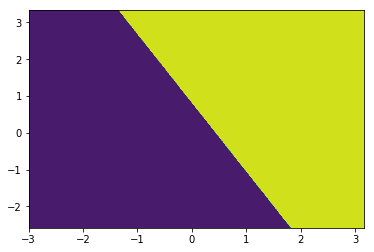

In [33]:
# visualizing data
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, X_set[:,0].max()+1, step=0.01),
                     np.arange(X_set[:,1].min() - 1, X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape))

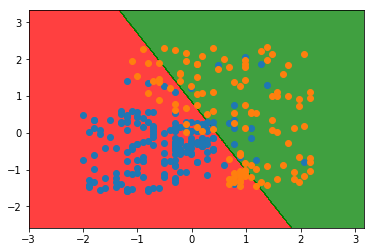

In [35]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


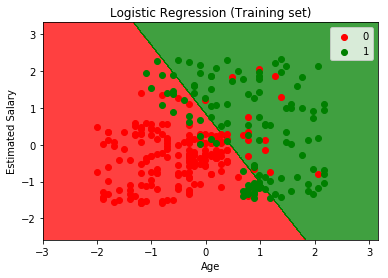

In [37]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title("Logistic Regression (Training set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()